# Part 1. Tải dữ liệu lên

In [8]:
import pandas as pd
data=pd.read_csv('Trained_Data_Plus.csv')
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,50,4,1,2,0,2143,1,0,5,5,4.35,1,-1,0,1,0
1,40,9,2,1,0,29,1,0,5,5,2.52,1,-1,0,1,0
2,30,2,1,1,0,2,1,1,5,5,1.27,1,-1,0,1,0
3,30,4,1,2,0,231,1,0,5,5,2.32,1,-1,0,1,0
4,20,4,2,2,0,447,1,1,5,5,3.62,1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,20,9,2,1,0,505,0,1,17,11,6.43,2,-1,0,1,1
40837,50,9,1,2,0,825,0,0,17,11,16.28,3,-1,0,1,1
40838,60,5,0,0,0,1729,0,0,17,11,7.60,2,-1,0,1,1
40839,60,5,1,1,0,5715,0,0,17,11,18.78,5,184,3,4,1


# Part 2. Training mô hình

# I. DNN

In [9]:
#prepare
from __future__ import print_function
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras import metrics
from sklearn.model_selection import train_test_split

In [10]:
#split data
Data_X=data[['age','job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
Data_y=data['y']
Data_X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,50,4,1,2,0,2143,1,0,5,5,4.35,1,-1,0,1
1,40,9,2,1,0,29,1,0,5,5,2.52,1,-1,0,1
2,30,2,1,1,0,2,1,1,5,5,1.27,1,-1,0,1
3,30,4,1,2,0,231,1,0,5,5,2.32,1,-1,0,1
4,20,4,2,2,0,447,1,1,5,5,3.62,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,20,9,2,1,0,505,0,1,17,11,6.43,2,-1,0,1
40837,50,9,1,2,0,825,0,0,17,11,16.28,3,-1,0,1
40838,60,5,0,0,0,1729,0,0,17,11,7.60,2,-1,0,1
40839,60,5,1,1,0,5715,0,0,17,11,18.78,5,184,3,4


In [46]:
Data_y

0        0
1        0
2        0
3        0
4        0
        ..
40836    1
40837    1
40838    1
40839    1
40840    0
Name: y, Length: 40841, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
     Data_X, Data_y, test_size=5841)

In [0]:
#Chuyển về dạng One-host
num_classes=2;
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
#buil model
from keras.models import Model
from keras.layers import Input

model=Model()

input_layer = Input(shape=(15,), name = 'input')

dense_1 = Dense(units = 128, activation='relu')(input_layer)
dense_2 = Dense(units = 256, activation='relu')(dense_1)
dense_3 = Dense(units = 256, activation='relu')(dense_2)
dense_out = Dense(units = 2, activation='softmax')(dense_3)
model = Model(inputs = input_layer, outputs = dense_out)
model.summary()




Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 101,378
Trainable params: 101,378
Non-trainable params: 0
_________________________________________________________________


In [0]:
#loss, metrics
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])

In [0]:
#train
model.fit(X_train, y_train, epochs=60)
model.save('trained_model.h100')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/60





35000/35000 [==============================] - 3s 97us/step - loss: 2.2768 - acc: 0.8586
Epoch 2/60
35000/35000 [==============================] - 2s 69us/step - loss: 1.8342 - acc: 0.8862
Epoch 3/60
35000/35000 [==============================] - 2s 68us/step - loss: 1.8342 - acc: 0.8862
Epoch 4/60
35000/35000 [==============================] - 2s 66us/step - loss: 1.8342 - acc: 0.8862
Epoch 5/60
35000/35000 [==============================] - 2s 68us/step - loss: 1.8342 - acc: 0.8862
Epoch 6/60
35000/35000 [==============================] - 2s 68us/step - loss: 1.8342 - acc: 0.8862
Epoch 7/60
35000/35000 [==============================] - 2s 69us/step - loss: 1.8342 - acc: 0.8862
Epoch 8/60
35000/35000 [==============================] - 2s 68us/step - loss: 1.8342 - acc: 0.8862
Epoch 9/60
35000/35000 [==============================] - 2s 68us/step - loss: 1.8342 - acc: 0.886

In [0]:
#test
from keras.models import load_model
model = load_model('trained_model.h100')
result = model.predict(X_test)
result

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
result=np.argmax(result, axis=1)
result

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
n=np.sum(result)
n

0

In [0]:
y_test[0:40]

2456     0
24042    0
3398     0
21269    0
37207    1
8131     0
30817    0
1134     0
10760    0
37709    0
25045    0
20411    0
8730     0
473      0
27662    0
13677    0
14798    0
8316     0
36887    1
27997    0
21443    0
36130    0
18930    0
1409     0
25609    1
26929    0
30979    1
11552    0
18241    0
15032    1
4933     0
38429    1
30740    0
35793    0
12691    0
27206    0
38955    1
35593    0
32386    0
3168     0
Name: y, dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, result)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[5158    0]
 [ 683    0]]


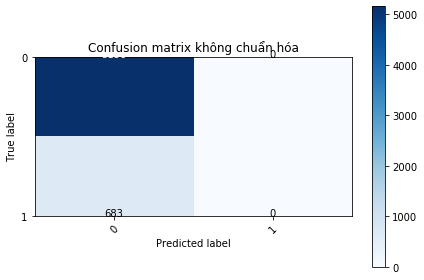

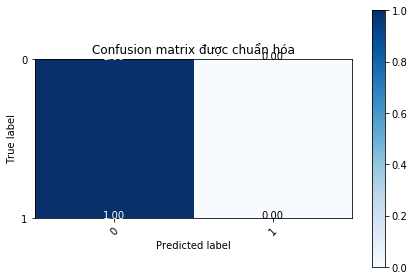

In [0]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix không chuẩn hóa')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix được chuẩn hóa')

plt.show()

In [0]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5158
           1       0.00      0.00      0.00       683

    accuracy                           0.88      5841
   macro avg       0.44      0.50      0.47      5841
weighted avg       0.78      0.88      0.83      5841



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# II. KNN

k=1 86.00 (+/- 0.68)
k=2 88.90 (+/- 0.54)
k=3 88.53 (+/- 0.39)
k=4 88.92 (+/- 0.49)
k=5 88.80 (+/- 0.39)
k=6 88.93 (+/- 0.45)
k=7 88.82 (+/- 0.37)
k=8 88.90 (+/- 0.54)
k=9 88.82 (+/- 0.51)
k=10 88.89 (+/- 0.53)
k=11 88.78 (+/- 0.55)
k=12 88.83 (+/- 0.58)
k=13 88.75 (+/- 0.51)
k=14 88.82 (+/- 0.49)
k=15 88.82 (+/- 0.50)
k=16 88.88 (+/- 0.51)
k=17 88.85 (+/- 0.49)
k=18 88.83 (+/- 0.53)
k=19 88.81 (+/- 0.52)
k=20 88.82 (+/- 0.56)
k=21 88.77 (+/- 0.58)
k=22 88.80 (+/- 0.56)
k=23 88.80 (+/- 0.54)
k=24 88.79 (+/- 0.58)
k=25 88.83 (+/- 0.55)
The optimal number of neighbors is 5 with 88.9%


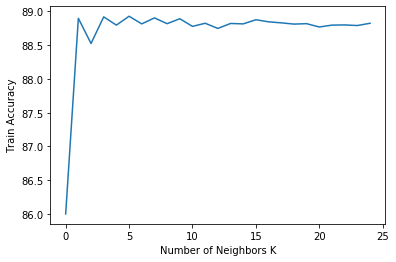

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

X_trainK, X_testK, y_trainK, y_testK = train_test_split(Data_X, Data_y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print('Accuracy: ',round(accuracy_score(y_test, knnpred),2)*100)

Accuracy:  89.0


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, knnpred)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[5037  121]
 [ 668   15]]


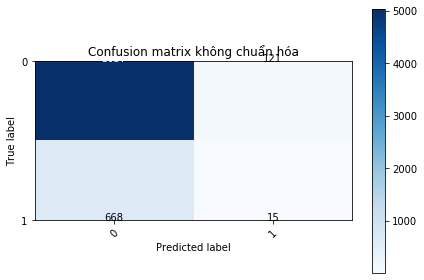

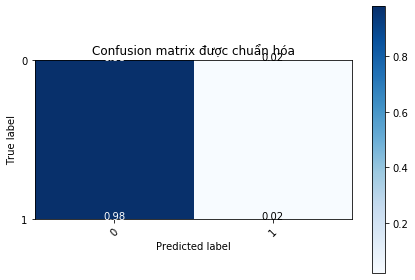

In [0]:
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix không chuẩn hóa')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix được chuẩn hóa')

plt.show()

In [0]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5158
           1       0.11      0.02      0.04       683

    accuracy                           0.86      5841
   macro avg       0.50      0.50      0.48      5841
weighted avg       0.79      0.86      0.82      5841



# III. LR

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy: 0.90


In [0]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
a=np.sum(y_pred)
a

337

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5035  123]
 [ 469  214]]


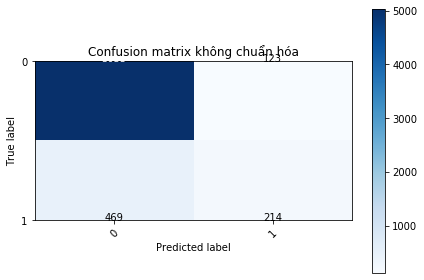

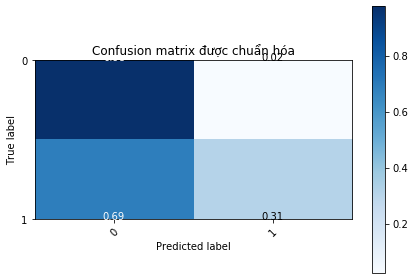

In [0]:
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix không chuẩn hóa')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix được chuẩn hóa')

plt.show()

# RFC

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# train model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9084060948467728

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rfc_pred)
print(confusion_matrix)

[[5050  132]
 [ 403  256]]


In [16]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

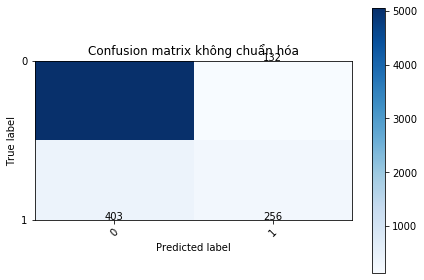

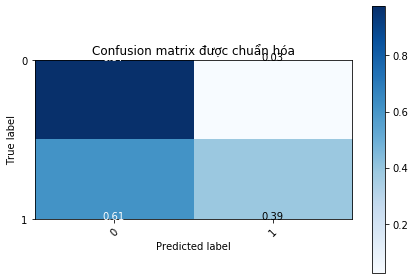

In [18]:
# Plot non-normalized confusion matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix không chuẩn hóa')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix được chuẩn hóa')

plt.show()

In [19]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5182
           1       0.66      0.39      0.49       659

    accuracy                           0.91      5841
   macro avg       0.79      0.68      0.72      5841
weighted avg       0.90      0.91      0.90      5841

